# Статистика, DS-поток
## Практическое задание 3


**Правила:**

* Дедлайн **27 сентября 16:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 50 баллов
* Задача 3 &mdash; 70 баллов
* Задача 4 &mdash; 50 баллов

**Важность задач:**

* *высокая:* задачи 1, 3;
* *средне-высокая:* задача 2, 4.

*Замечания.*
1. Вы должны помнить о разнице между доверительным интервалом и *реализацией* доверительного интервала. На практике обычно слово *реализация* опускается.
2. Если интервал получен на лекции/семинаре, то нужно просто выписать его формулу. Если такой случай не рассматривался, то нужно добавить его вывод.
3. Выборку надо сгенерировать один раз. Дело в том, что на практике при недостаточном размере выборки разумнее дособрать выборку, чем заново проводить все измерения.

In [432]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
import pandas as pd

sns.set(font_scale=1.5, palette='Set2')
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

______________
## Задача 1.

В этой задаче нужно визуализировать доверительные интервалы для выборки из равномерного распределения.

Чтобы не плодить код, напишите следующую функцию (см. ниже). При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".

In [281]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None, 
    ylim=(None, None), color_estimation='#FF3300', color_interval='#00CC66', 
    color_sample='#0066FF', label_estimation='Оценка', label_interv='А.Д.И.', draw_sample=True, draw_est=True
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    :param label_interv: название интервала (АДИ или ТДИ)
    :param draw_sample: нужно ли рисовать выборку
    :param: draw_est: нужно ли рисовать оценку
    '''
    
    n = len(sample)
        
    if sample is not None and draw_sample:
        plt.scatter(np.arange(n) + 1, sample, color = color_sample, alpha=0.45, label='Выборка')
        
    if estimation is not None and draw_est:
        plt.plot(np.arange(n) + 1, estimation, color = color_estimation, label=label_estimation)
        
        
    plt.fill_between(np.arange(n) + 1, left, right, alpha=0.2, color=color_interval, label=label_interv)
    
    plt.xlabel('Размер выборки')
    plt.ylim(ylim)
    plt.xlim((0, n))
    plt.legend()

Пусть $X = (X_1, ..., X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Постройте асимптотические доверительные интервалы: Вальда и на основе аппроксимации $X_{(n)}$ некоторым распределением. Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя написанную выше функцию. Нужно нанести на график точки выборки.

Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.

Для двух статистик, используемых при построении интервалов, запишите аппроксимацию некоторым распределением неформально в виде "статистика по выборке достаточно большого размера приближенно имеет такое-то распределение". 

Сделайте вывод о том, как влияет на ширину интервала вид статистики и аппроксимация.

**Решение:**

Асимптотический доверительный Вальда

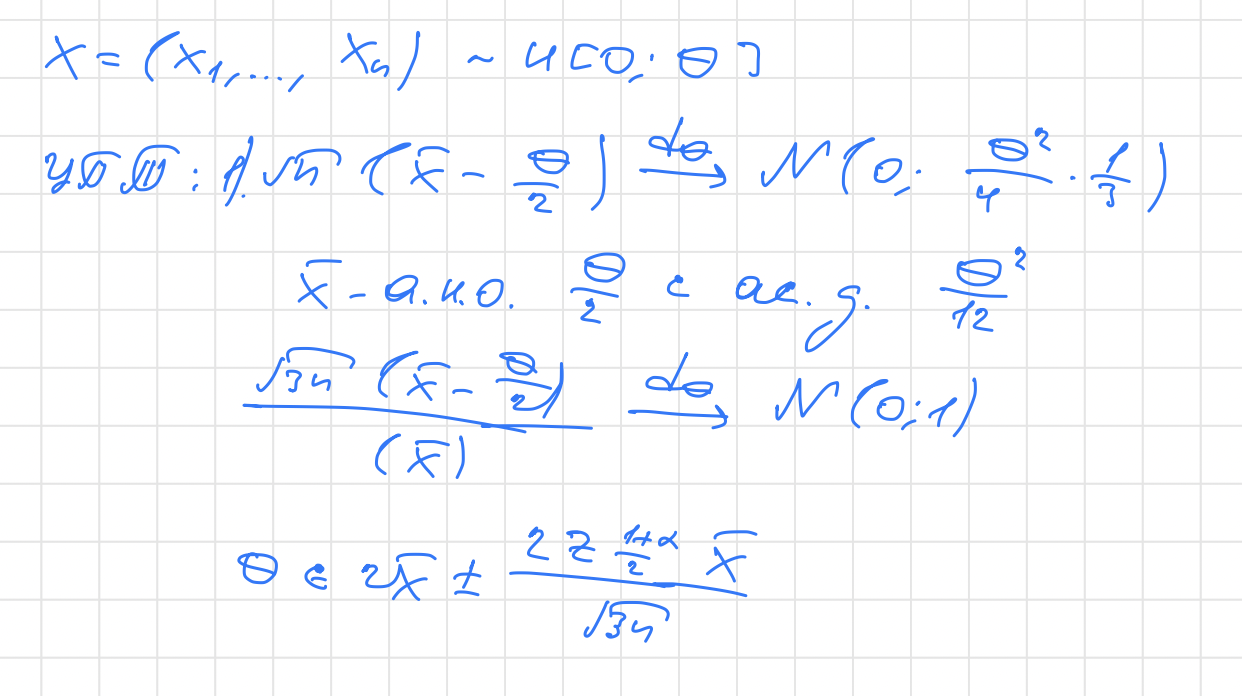

In [431]:
Image("1.1.png")

Асимптотический доверительный интервал на основе оценки $X_{(n)}$

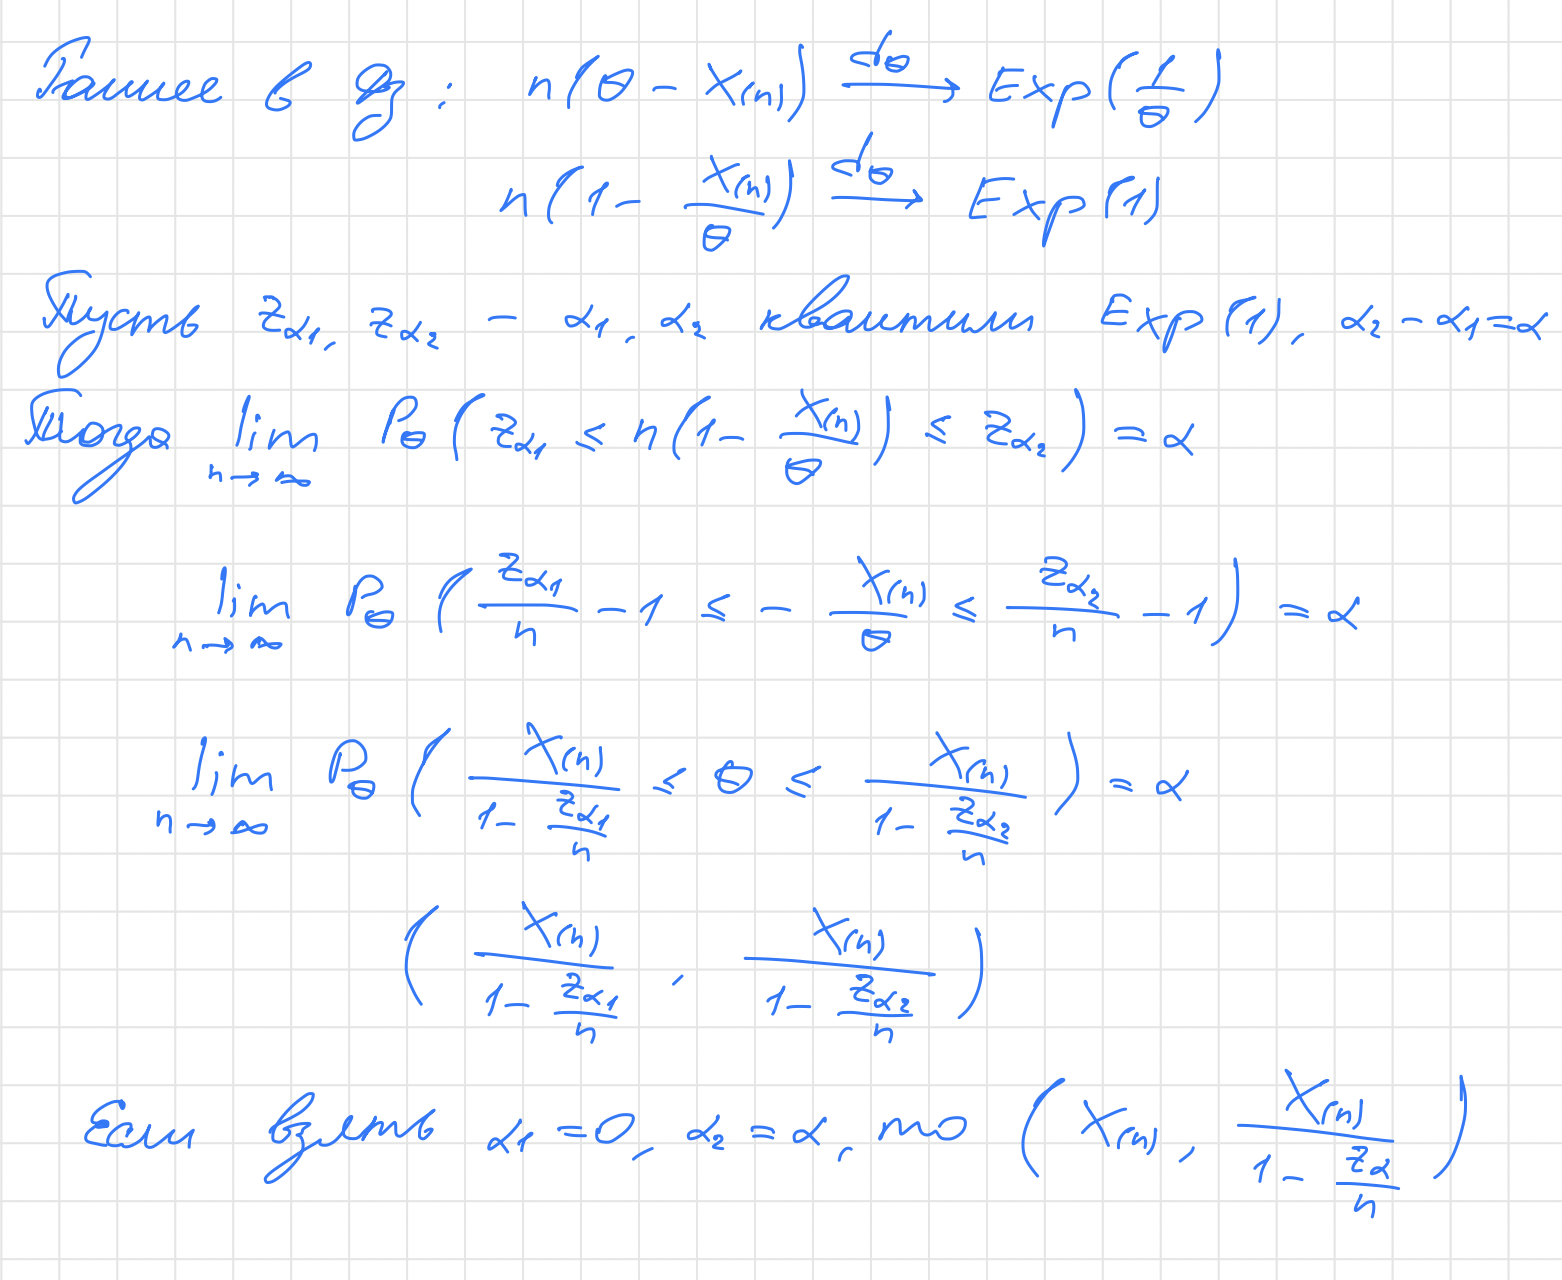

In [434]:
Image("1.2.png")

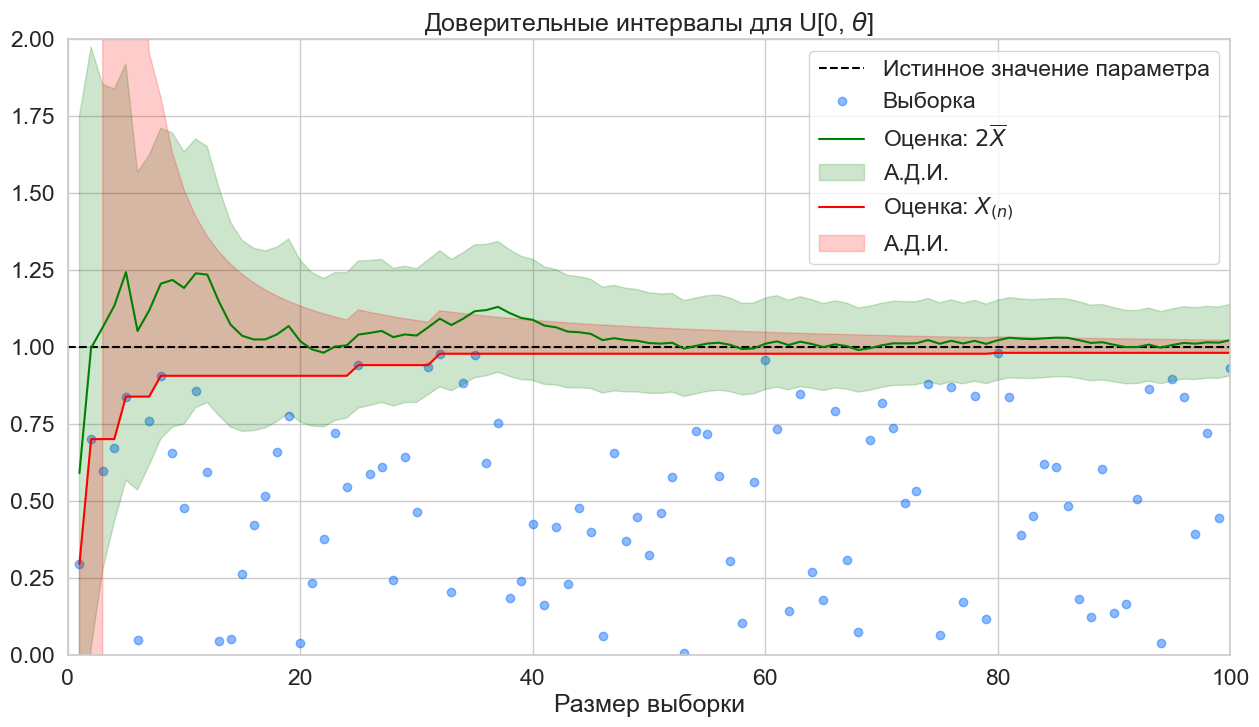

In [436]:
sns.set_style('whitegrid')
N = 100
alpha = 0.95
theta = 1

sample = sps.uniform(loc=0, scale=theta).rvs(size=N)

estimation_mean = 2 * (sample.cumsum() / (np.arange(N) + 1))
d_mean = sps.norm.ppf((1 + alpha) / 2) * estimation_mean / np.sqrt(3 * np.arange(N) + 1)
left_mean = estimation_mean - d_mean
right_mean = estimation_mean + d_mean

estimation_stat = np.array(pd.Series(sample).cummax())
d_stat = 1 / (1 - sps.expon(1).ppf(alpha) / (np.arange(N) + 1))
left_stat = estimation_stat
right_stat = estimation_stat * d_stat

plt.figure(figsize=(15, 8))

plt.hlines(1, 0, N, color='black', linestyles='dashed', label='Истинное значение параметра')

draw_confidence_interval(left=left_mean, right=right_mean, estimation=estimation_mean, sample=sample, ylim=(0, 2),
                        label_estimation='Оценка: $2\overline{X}$', color_estimation='green', color_interval='green',
                        label_interv='А.Д.И.')
draw_confidence_interval(left=left_stat, right=right_stat, estimation=estimation_stat, sample=sample,
                        label_estimation='Оценка: $X_{(n)}$', color_estimation='red' ,color_interval='red',
                         label_interv='А.Д.И.', draw_sample = False)

plt.title('Доверительные интервалы для U[0, $\\theta$]');

**Вывод:** Из графика видно, что истинное значение параметра лежит в обоих полученных интервалов, что достаточно хорошо, но интервал у $X_{(n)}$ лучше, тк быстрее уменьшается. Видно, что интервал у $X_{(n)}$ уменьшается быстрее (как $n$), а интервал у $2\overline{X}$ медленнее (как $\sqrt {n}$). Интервалы асимптотические, поэтому они показывают все в пределе, что также заметно, тк при малых значениях выборки интервалы очень большие. Также видно, что $X_{(n)}$ лучше приближает истинное значение параметра, чем $2\overline{X}$.

_________________
## Задача 2.
Аналогично задаче 1 сгенерируйте выборку $X_1, ... X_{100}$ из распределения $\Gamma(3, 2)$ и постройте доверительные интервалы для следующих случаев:

* точный асимптотический доверительный интервал в параметрической модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно;
* точный асимптотический доверительный интервал для $\theta$ в параметрической модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки наносить на график не нужно. 

Вывод данных интервалов достаточно объемный, и как мне показалось, выклажывать его сюда будет загромождением практической работы (если что вывод есть в теор задании в 4 задаче под пунктами а и б.

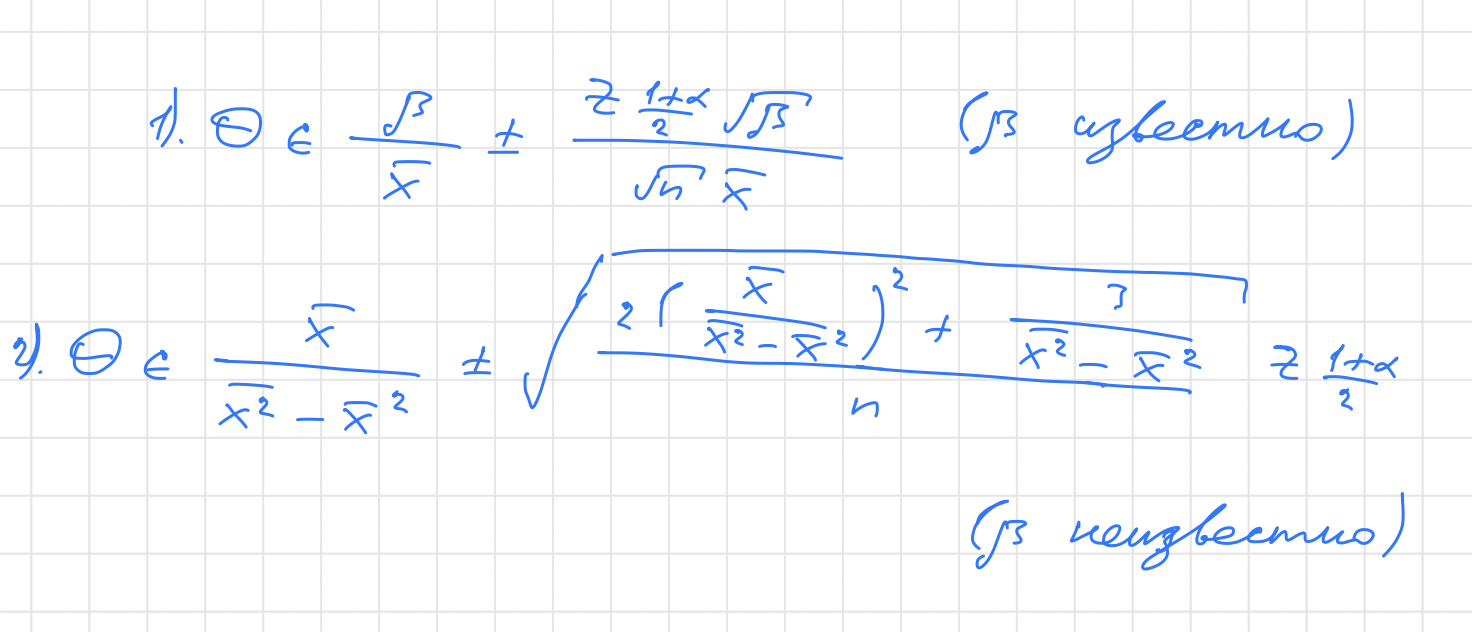

In [437]:
Image("1.3.png")

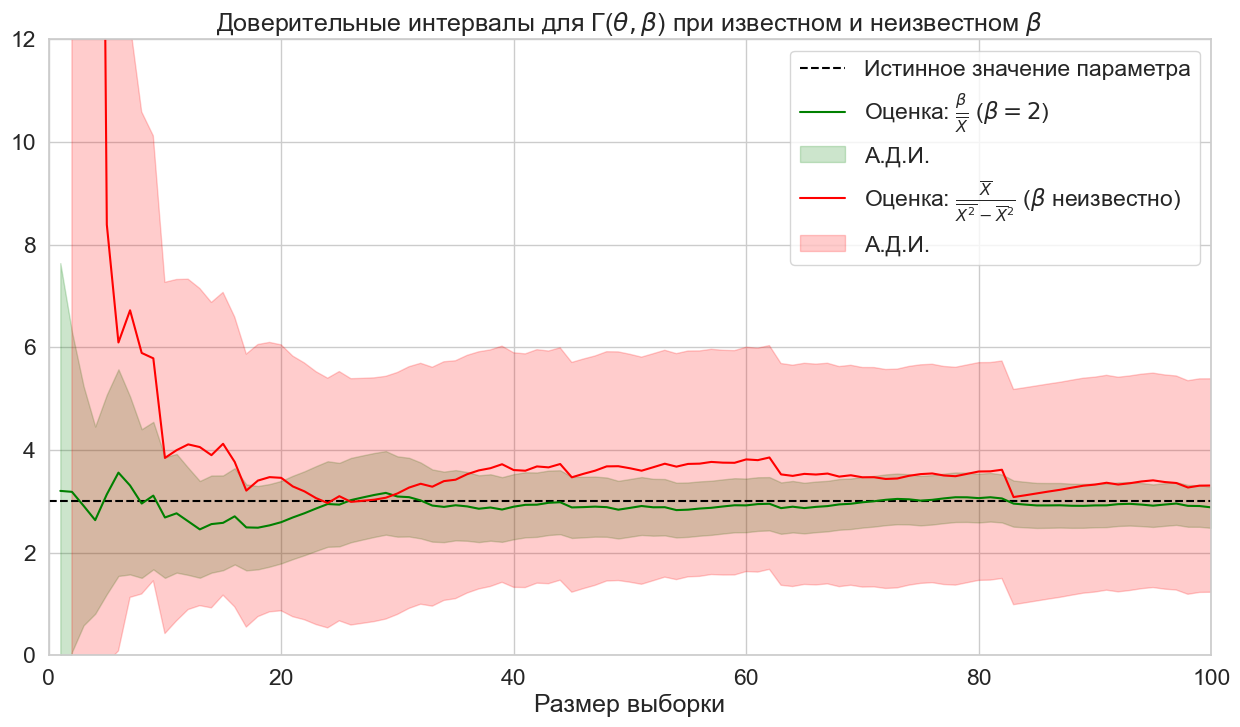

In [423]:
sns.set_style('whitegrid')
N = 100
alpha = 0.95
theta = 3
beta = 2

sample = sps.gamma(a=beta, scale=1/theta).rvs(size=N)

sample_mean = sample.cumsum() / (np.arange(N) + 1)
sample_square_mean = (sample**2).cumsum() / (np.arange(N) + 1)
estimation_first = beta / sample_mean
d_first = sps.norm.ppf((1 + alpha) / 2) * np.sqrt(beta) / (np.sqrt(np.arange(N) + 1) * sample_mean)
left_first = estimation_first - d_first
right_first = estimation_first + d_first

estimation_second = sample_mean / (sample_square_mean - sample_mean**2)
d_second = (np.sqrt(2 * (estimation_second ** 2) + 3 / (sample_square_mean - sample_mean**2)) / np.arange(N) + 1) \
                                                                                    * sps.norm.ppf((1 + alpha) / 2)
left_second = estimation_second - d_second
right_second = estimation_second + d_second

plt.figure(figsize=(15, 8))

plt.hlines(3, 0, N, color='black', linestyles='dashed', label='Истинное значение параметра')

draw_confidence_interval(left=left_first, right=right_first, estimation=estimation_first, sample=sample,
                        label_estimation='Оценка: $\\frac{\\beta}{\overline{X}}$ ($\\beta = 2$)',
                         color_estimation='green', color_interval='green', label_interv='А.Д.И.',
                         draw_sample = False)
draw_confidence_interval(left=left_second, right=right_second, estimation=estimation_second, sample=sample,
        label_estimation='Оценка: $\\frac{\overline{X}}{\overline{X^2} - \overline{X}^2}$ ($\\beta $ неизвестно)',
                         color_estimation='red', color_interval='red', 
                         label_interv='А.Д.И.', draw_sample = False)
plt.ylim(0, 12)
plt.title('Доверительные интервалы для Г($\\theta, \\beta$) при известном и неизвестном $\\beta$');

Сравните полученные интервалы и поясните наблюдаемый эффект.

**Вывод:** Из графика видно, что интервал для параметра $\theta$ при известном параметре $\beta$ получился лучше, тк он сам меньше, еще и уменьшается быстрее. Но в целом истинное значение параметра попадает в оба интервала, что хорошо. Также видно, что интервалы асимптотические, поэтому при малых значениях выборки они очень большие, но при больших размерах выборки интервалы становятся намного лучше. Еще оценка $\frac{\beta}{\overline{X}}$ лучше приближает истинное значение параметра, чем оценка $\frac{\overline{X}}{\overline{X^2} - \overline{X}^2}$.

__________________
## Задача 3.
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимтотический доверительный интервал при помощи центральной предельной теоремы и леммы Слуцкого;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.

Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал: $\overline{X} \pm \frac{z_{\frac{1 + \alpha}{2}} S}{\sqrt{n}}$

Точный доверительный интервал: $\overline{X} \pm T_{n - 1, \frac{1 + \alpha}{2}} \frac{S}{\sqrt{n - 1}}$

Реализуйте функции построения этих интервалов по выборке. Задокументируйте функции (см. [гайд](https://realpython.com/documenting-python-code/)).

In [331]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    
    """
    Считает асимптотический доверительный интервал параметра сдвига для нормальной модели при условии неизвестной
    дисперсии.
    
    Аргументы
    ---------
    sample (np.array): выборка из нормального распределения
    alpha (float): уровень доверия доверительного интервала
    
    Возвращаемое значение
    --------
    tuple of np.array: кортеж из двух границ доверительного интервала (в завсимости от n)
    """
    
    n = len(sample)
    estimation = sample.cumsum() / (np.arange(n) + 1)
    S = np.sqrt((sample**2).cumsum() / (np.arange(n) + 1) - estimation**2)
    d = sps.norm.ppf((1 + alpha) / 2) * S / np.sqrt(np.arange(n) + 1)
    return (estimation - d, estimation + d)

def calculate_confidence_intervals(sample, alpha=0.95):
    
    """
    Считает точный доверительный интервал параметра сдвига для нормальной модели при условии неизвестной
    дисперсии.
    
    Аргументы
    ---------
    sample (np.array): выборка из нормального распределения
    alpha (float): уровень доверия доверительного интервала
    
    Возвращаемое значение
    --------
    tuple of np.array: кортеж из двух границ доверительного интервала (в завсимости от n)
    """
    
    n = len(sample)
    estimation = sample.cumsum() / (np.arange(n) + 1)
    S = np.sqrt((sample**2).cumsum() / (np.arange(n) + 1) - estimation**2)
    d = sps.t.ppf((1 + alpha) / 2, np.arange(n)) * S / np.sqrt(np.arange(n))
    return (estimation - d, estimation + d)

Сгенерируйте выборку из нормального расределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассматривайте длину выборки около 20-30.

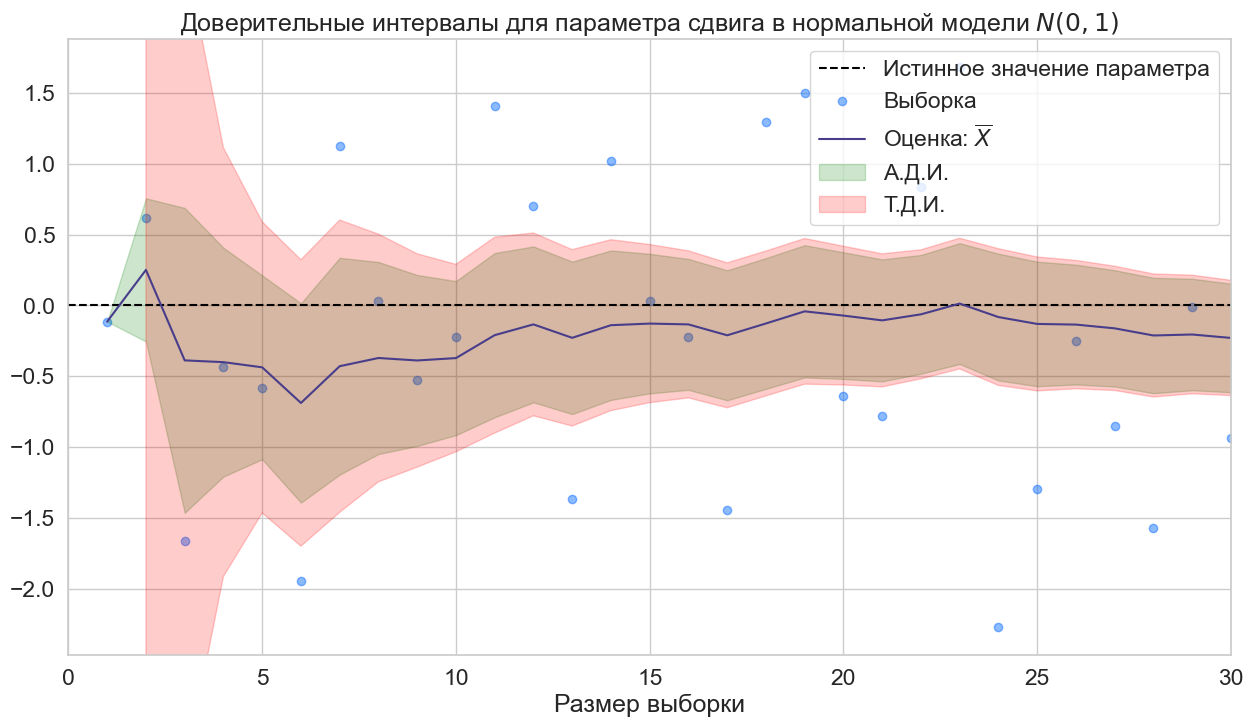

In [406]:
N = 30
alpha = 0.95

sample = sps.norm.rvs(size=N)

estimation = sample.cumsum() / (np.arange(N) + 1)
left_first, right_first = calculate_asymptotic_confidence_intervals(sample=sample, alpha=alpha)
left_second, right_second = calculate_confidence_intervals(sample=sample, alpha=alpha)

plt.figure(figsize=(15, 8))

plt.hlines(0, 0, N, color='black', linestyles='dashed', label='Истинное значение параметра')

draw_confidence_interval(left=left_first, right=right_first, estimation=estimation, sample=sample,
                        label_estimation='Оценка: $\overline{X}$', color_estimation='#483D8B',
                         color_interval='green', label_interv='А.Д.И.')

draw_confidence_interval(left=left_second, right=right_second, estimation=estimation, sample=sample,
                        label_estimation='$\overline{X}$', color_estimation='red', color_interval='red', 
                         label_interv='Т.Д.И.', draw_sample=False, draw_est = False)
plt.title('Доверительные интервалы для параметра сдвига в нормальной модели $N(0, 1)$');

**Вывод:** Из графика видно, что при малых размерах выборки асимптотический и точный доверительные интервалы сильно отличаются, но затем при размере выборки около 10 и более интервалы становятся очень сильно похожими. Это и логчино, тк распределение Стьюдента стремится к стандартному нормальному (при $n$ -> $+\infty$), где $n$ - количество степеней свободы или размер выборки в данном случае. Истинное значение параметра лежит в обоих интервалах, что хорошо, тк задача состоит именно в этом. Оценка же (то есть среднее) не очень хорошо показывает истинное значение параметра даже при больших размерах выборки, это может быть связано с тем, что в выборке есть немало выбросов.

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

In [301]:
data_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',
              'Proline']
data = pd.read_csv('wine.data', names=data_names)

In [307]:
df = data[data['Class'] == 1][['Alcalinity of ash', 'Nonflavanoid phenols', 'Proanthocyanins', 'Hue']]

In [365]:
names = ['Alcalinity of ash', 'Nonflavanoid phenols', 'Proanthocyanins', 'Hue']
interv = ['left_border a.c.i', 'right_border a.c.i', 'left_border c.i', 'right_border c.i']
data_est = pd.DataFrame(columns=names, index=interv)

n = df.shape[0]
for name in names:
    left_aci, right_aci = calculate_asymptotic_confidence_intervals(df[name])
    left_ci, right_ci = calculate_confidence_intervals(df[name])
    data_est[name] = [left_aci[n - 1], right_aci[n - 1], left_ci[n - 1], right_ci[n - 1]]

In [366]:
data_est # таблица с доверительными интервалами

,Alcalinity of ash,Nonflavanoid phenols,Proanthocyanins,Hue
left_border a.c.i,16.393084,0.272278,1.795061,1.032564
right_border a.c.i,17.681492,0.307722,2.003583,1.091503
left_border c.i,16.373713,0.271745,1.791926,1.031678
right_border c.i,17.700863,0.308255,2.006718,1.092389


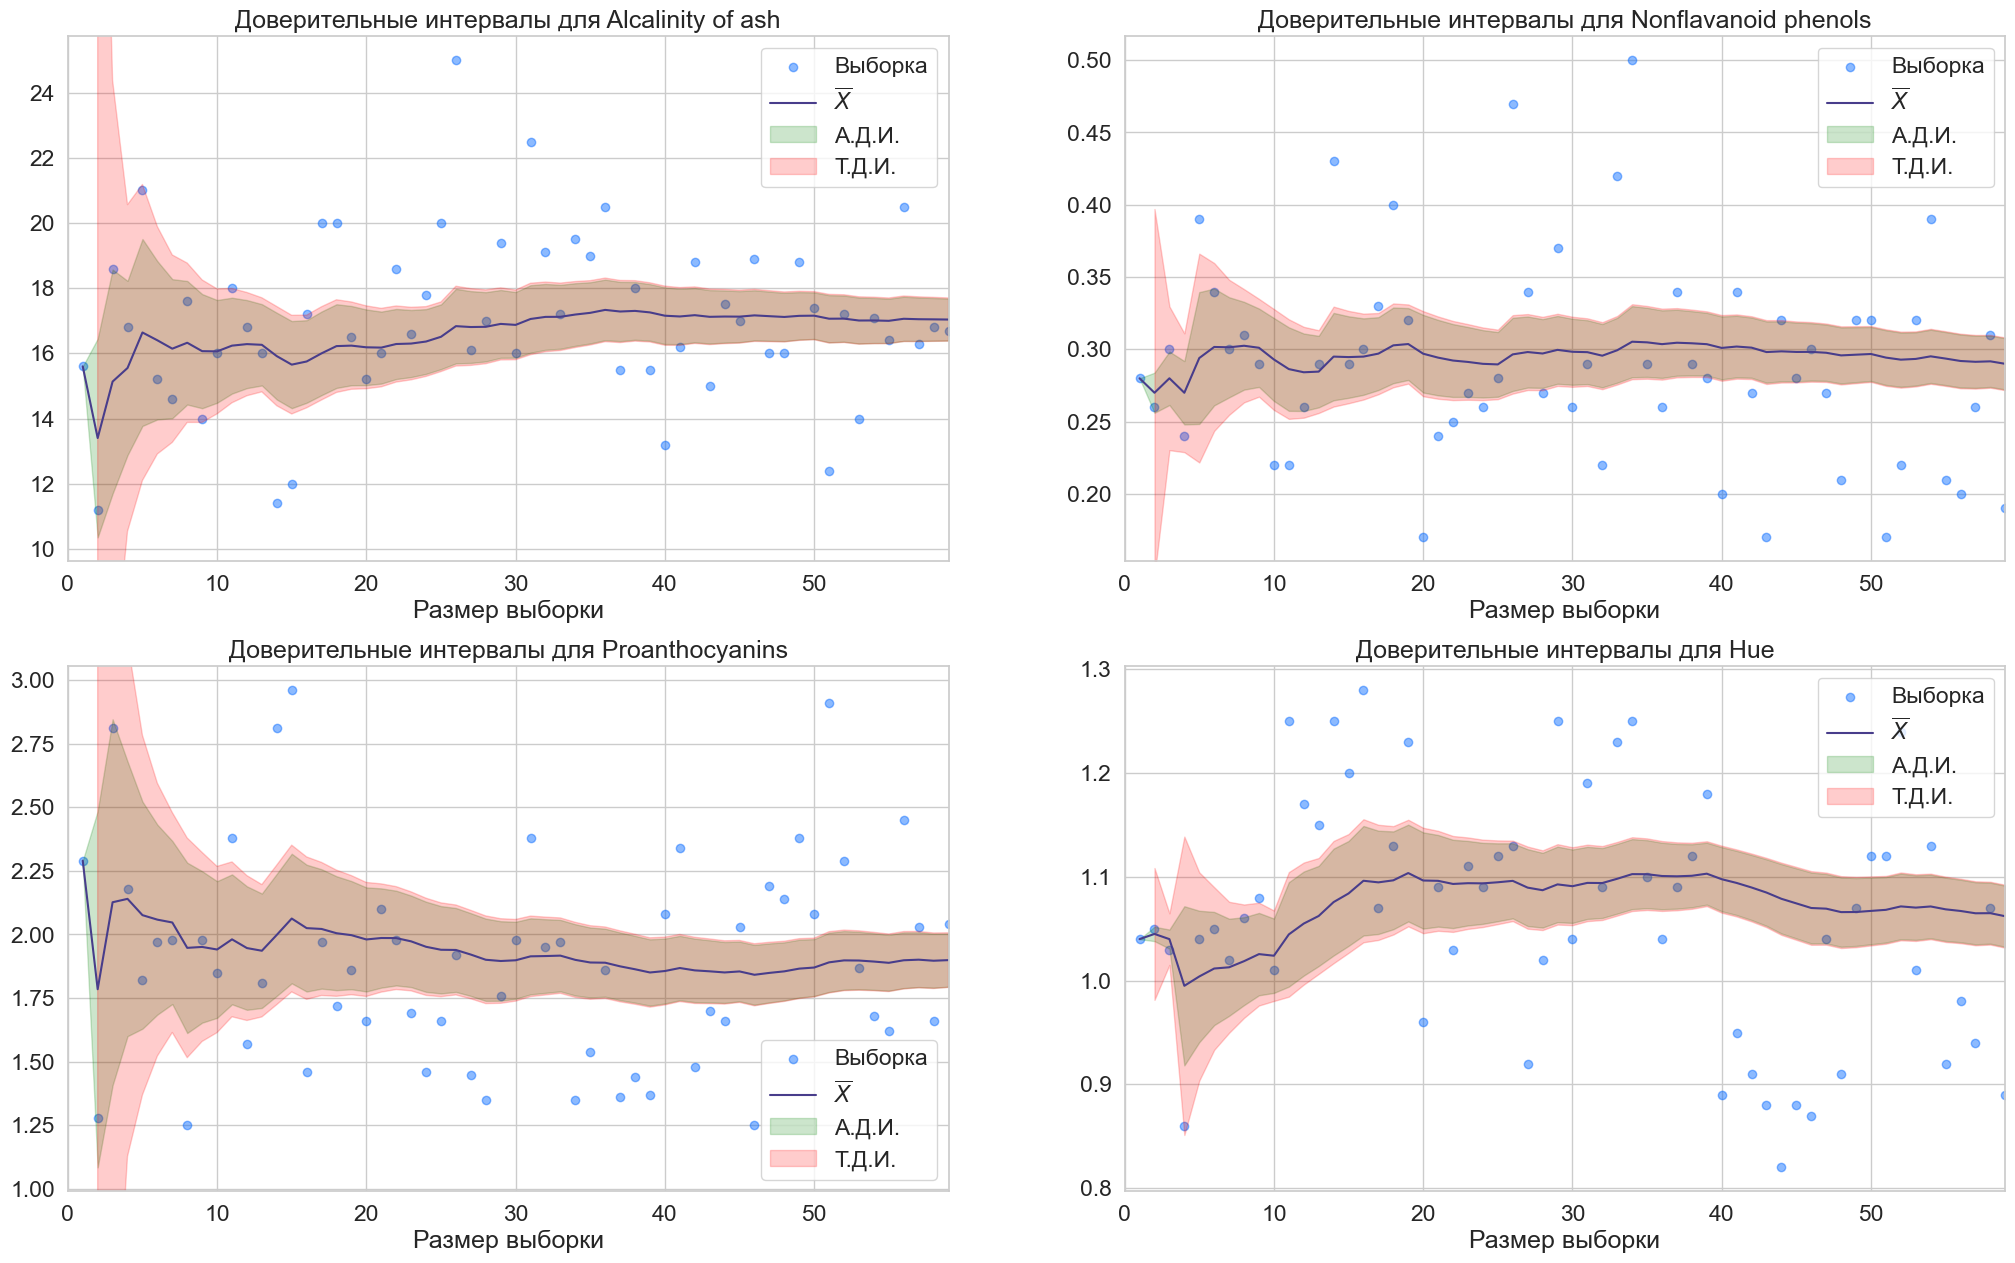

In [384]:
fig = plt.figure(figsize=(25, 15))

i = 0
for name in names:
    plt.subplot(2, 2, i + 1)
    sample = np.array(df[name])
    n = len(sample)
    estimation = sample.cumsum() / (np.arange(n) + 1)
    left_aci, right_aci = calculate_asymptotic_confidence_intervals(df[name])
    left_ci, right_ci = calculate_confidence_intervals(df[name])
    
    draw_confidence_interval(left=left_aci, right=right_aci, estimation=estimation, sample=sample,
                         label_estimation='$\overline{X}$', color_estimation='#483D8B',
                         color_interval='green', label_interv='А.Д.И.')
    draw_confidence_interval(left=left_ci, right=right_ci, estimation=estimation, sample=sample,
                         label_estimation='$\\frac{\overline{X}}{\overline{X^2} - \overline{X}^2}$',
                         color_estimation='red', color_interval='red', 
                         label_interv='Т.Д.И.', draw_sample=False, draw_est = False)
    plt.title('Доверительные интервалы для {}'.format(name))
    i += 1

**Вывод:** Видно, что как и при предыдущем анализе параметра сдвига стандратного распределения оба доверительных интервала становятся очень похожими при размере выборки около 10 и более. Все интервалы получились достаточно хорошими (небольшими) и посмотрев на каждый график можно примерно оценить значение параметра распределения. Однако мы просто предполагали, что столбцы имеют стандартное нормальное распределение, что может быть неправдой.

__________________
## Задача 4. 

Пусть $X_1, ..., X_n$ — выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную область для параметра $\theta = (a, \sigma^2)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения. Подумайте, как лучше разместить графики, чтобы читателю было удобнее воспринимать результаты.

In [ ]:
<...>

**Вывод:** <...>